# Chapter 4. From engagement to conversion

## 4.1 Decision trees

### Logistic regression versus decision trees

One thing that is noticeable here is that there are a lot of interactions between different variables. No single leaf node in this example tree is partitioned with one condition. Every partition in this tree is formed with more than one criterion and interactions between different feature variables. This is the main difference from logistic regression models. When there is no linear structure in the data, logistic regression models will not be able to perform well, as they try to find linear combinations among the feature variables. On the other hand, decision tree models will perform better for non-linear datasets, as they only try to partition the data at the purest levels they can

### Growing decision trees

There are two main methods that are commonly used for splitting the data: Gini impurity and entropy information gain. Gini impurity measures how impure a partition is, and entropy information gain measures how much information it gains from splitting the data with the criteria being tested

## 4.2 Decision trees and interpretations with python

In [9]:
%matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/Users/boyuan/Desktop/OneDrive/Hands on data science for martketing/bank-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_widgets()

### Data analysis and visualization

In [11]:
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


#### Conversion rate

In [12]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion').count()['y'] / df.shape[0] * 100.0
)
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [13]:
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


#### Conversion rates by job

In [14]:
conversion_rate_by_job = df.groupby(
    by = 'job'
)['conversion'].sum() / df.groupby(
    by = 'job'
)['conversion'].count() * 100.0
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

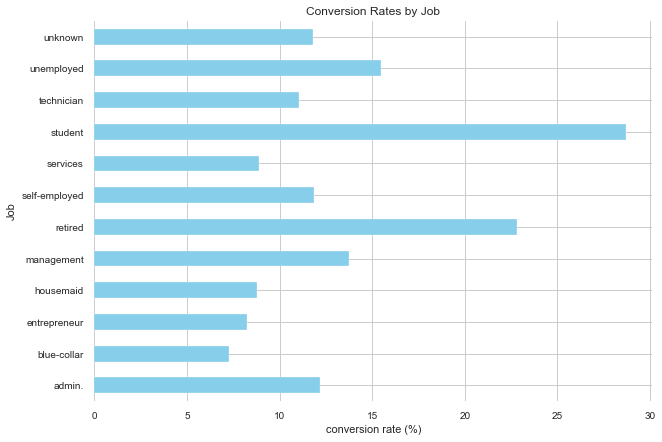

In [20]:
ax = conversion_rate_by_job.plot(
    kind = 'barh',
    color = 'skyblue',
    grid = True,
    figsize = (10, 7),
    title = 'Conversion Rates by Job'
)
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()

#### Default rates by conversions

In [22]:
default_by_conversion_df = pd.pivot_table(
    df,
    values = 'y',
    index = 'default',
    columns = 'conversion',
    aggfunc = len
)
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


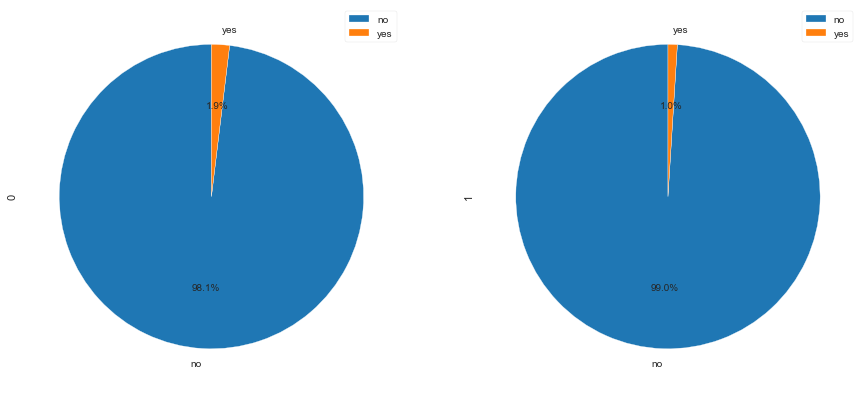

In [23]:
default_by_conversion_df.plot(
    kind = 'pie',
    figsize = (15, 7),
    startangle = 90,
    subplots = True,
    autopct = lambda x: '%0.1f%%' % x
)
plt.show()

#### Bank balances by conversions

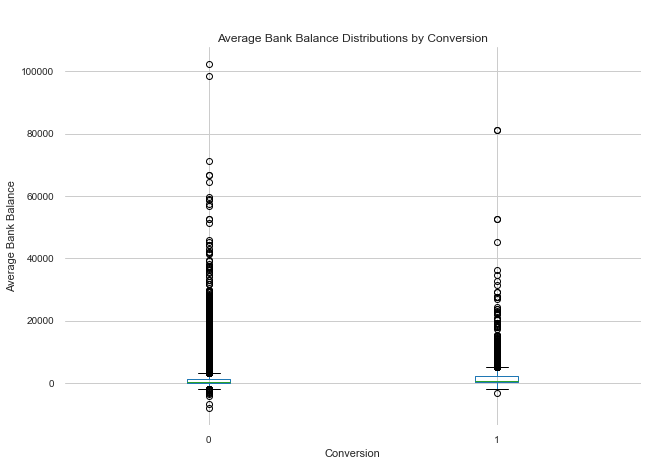

In [24]:
ax = df[['conversion', 'balance']].boxplot(
    by = 'conversion',
    showfliers = True,
    figsize = (10, 7)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle(' ')
plt.show()

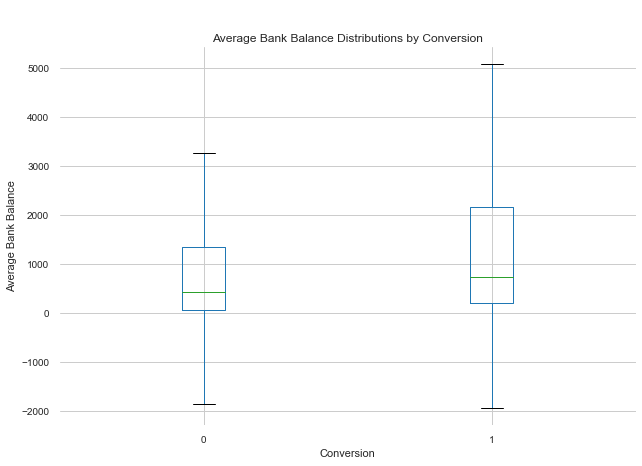

In [25]:
ax = df[['conversion', 'balance']].boxplot(
    by = 'conversion',
    showfliers = False,
    figsize = (10, 7)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle(' ')
plt.show()

#### Conversion rates by number of contacts 

In [28]:
conversions_by_num_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0
pd.DataFrame(conversions_by_num_contacts).head()

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
4,9.000568
5,7.879819


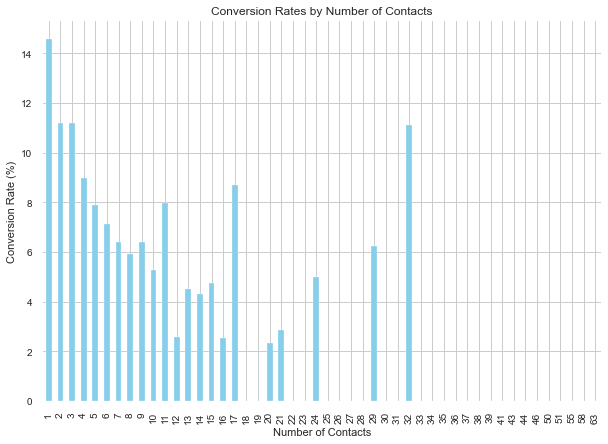

In [29]:
ax = conversions_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)
ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

### Encoding categorical variables

#### Encoding months

In [30]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [31]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = df['month'].apply(
    lambda x: months.index(x)+1
)
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [32]:
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

In [33]:
df.month.value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

#### Encoding jobs

In [34]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [36]:
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]
jobs_encoded_df.head()

,job_job_job_admin.,job_job_job_blue-collar,job_job_job_entrepreneur,job_job_job_housemaid,job_job_job_management,job_job_job_retired,job_job_job_self-employed,job_job_job_services,job_job_job_student,job_job_job_technician,job_job_job_unemployed,job_job_job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
df = pd.concat([df, jobs_encoded_df], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_job_job_entrepreneur,job_job_job_housemaid,job_job_job_management,job_job_job_retired,job_job_job_self-employed,job_job_job_services,job_job_job_student,job_job_job_technician,job_job_job_unemployed,job_job_job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


#### Encoding marital

In [42]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [43]:
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [44]:
df = pd.concat([df, marital_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_job_job_retired,job_job_job_self-employed,job_job_job_services,job_job_job_student,job_job_job_technician,job_job_job_unemployed,job_job_job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


#### Encoding the housing and loan variables

In [45]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

### Building decision trees

In [47]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

response_var = 'conversion'
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_job_job_admin.',
 'job_job_job_blue-collar',
 'job_job_job_entrepreneur',
 'job_job_job_housemaid',
 'job_job_job_management',
 'job_job_job_retired',
 'job_job_job_self-employed',
 'job_job_job_services',
 'job_job_job_student',
 'job_job_job_technician',
 'job_job_job_unemployed',
 'job_job_job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [48]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(max_depth = 4)
dt_model.fit(df[features], df[response_var])
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Interpreting decision trees

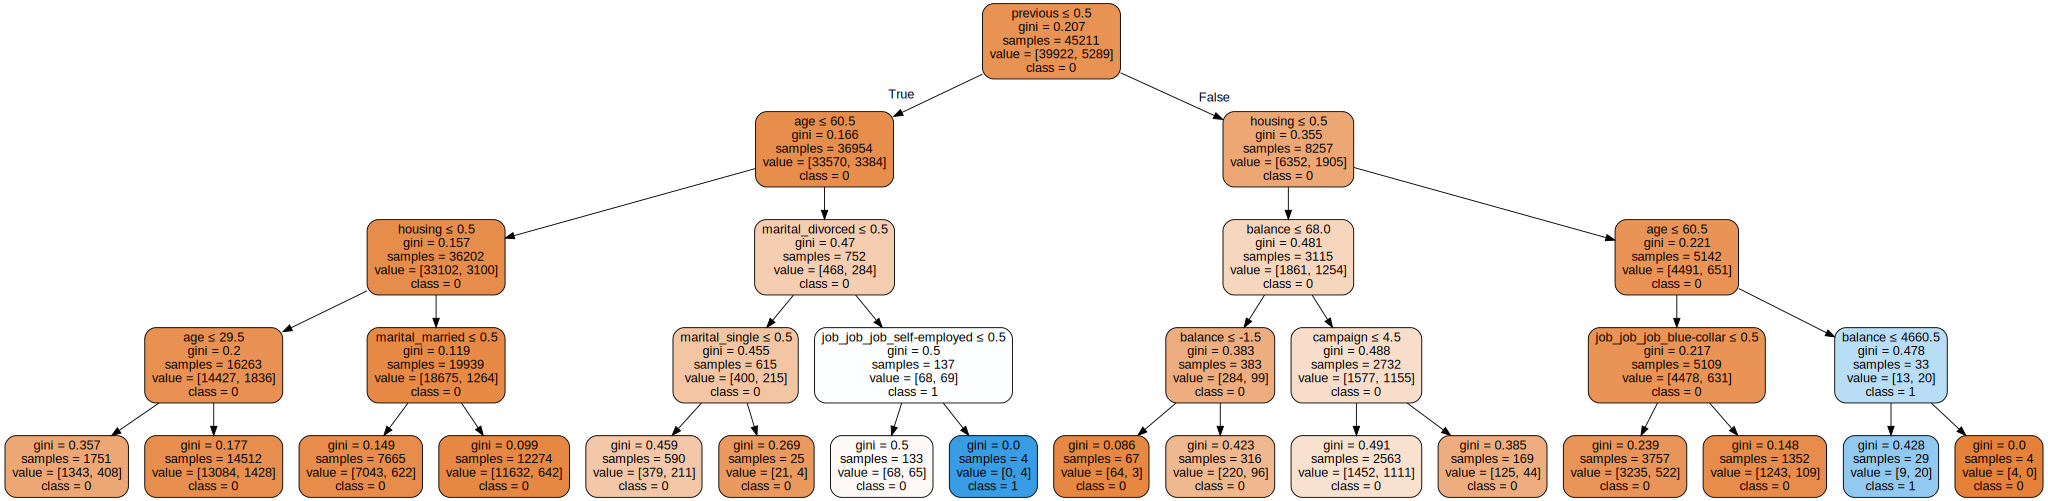

In [64]:
import graphviz
dot_data = tree.export_graphviz(
    dt_model,
    feature_names=features,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

## 4.3 Decision trees and interpretations with r